# Interpolation and extrapolation in Python

In [1]:
# PHZ3150 - Spring 2022

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### The meteorological balloon recorded a few temperatures, but due to instrument issues we only have the following observations:

In [3]:
temperature = [ 20, -20, -55, -55, -40, -20  ]  #C
altitude    = [ 0,    6,  12,  20,  32,  38  ]  #km 

### which results in this profile:

Text(0, 0.5, 'Altitude [km]')

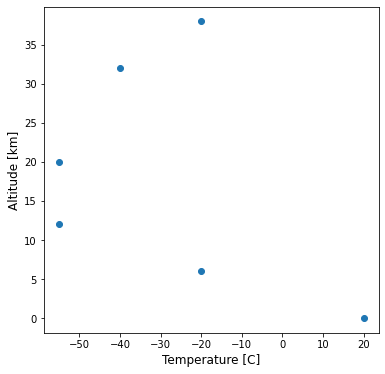

In [4]:
plt.figure( figsize = (6, 6) )
plt.plot( temperature, altitude, marker = 'o', linestyle = 'none')
plt.xlabel('Temperature [C]', fontsize = 12)
plt.ylabel('Altitude [km]', fontsize = 12)

### Is this a "lost" campaign, or can we use the existing data to define the TP profile of the Earth?

### What about if we had only these?

In [5]:
temperature = [ 20,  -40, -20  ]  #C
altitude    = [ 0,    32,  38  ]  #km 

Text(0, 0.5, 'Altitude [km]')

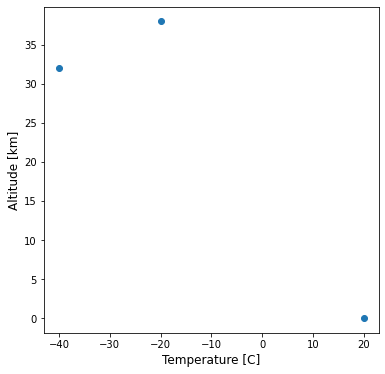

In [6]:
plt.figure( figsize = (6, 6) )
plt.plot( temperature, altitude, marker = 'o', linestyle = 'none')
plt.xlabel('Temperature [C]', fontsize = 12)
plt.ylabel('Altitude [km]', fontsize = 12)

## Interpolation

## Let's assume that we have two points (1,1) and (10,10):


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

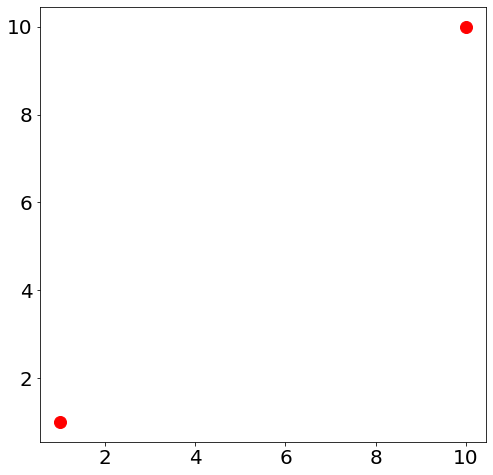

In [7]:
p1 = [1, 1]
p2 = [10, 10]

plt.figure( figsize = ( 8, 8 ) )
plt.plot( p1[ 0 ], p1[ 1 ], marker ='o', markersize = 12 , color = 'red')
plt.plot( p2[ 0 ], p2[ 1 ], marker ='o', markersize = 12 , color = 'red')
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )


### Assuming that the two are related, not random points (they follow some physical law) is there a way to figure out what happens between these two points? There's a lot of empty space between the two .....


### In this case it is a bit obvious that if I wanted to figure out the value of y for p3 with x = 5 it would be....and if I wanted the y of p4  with x = 7 it would be...


(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

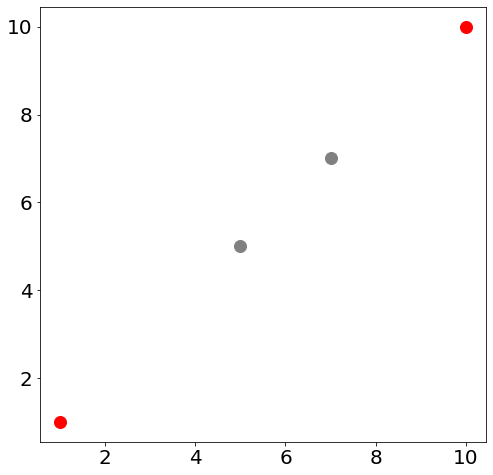

In [8]:
p3 = [ 5, 5 ]
p4 = [ 7, 7 ]

plt.figure( figsize = ( 8, 8 ) )

## plot the points:

plt.plot( p1[ 0 ], p1[ 1 ], marker ='o', markersize = 12, color = 'red')
plt.plot( p3[ 0 ], p3[ 1 ] , marker ='o', markersize = 12, color = 'gray') 
plt.plot( p4[ 0 ], p4[ 1 ] , marker ='o', markersize = 12, color = 'gray')
plt.plot( p2[ 0 ], p2[ 1 ], marker ='o', markersize = 12, color = 'red')
plt.xticks(fontsize = 20 )
plt.yticks(fontsize = 20 )

### But how do you figure this out in a mathematically consistent way? INTERPOLATION


### If you have a function f=f(x), interpolation is the process of using known values f(x0),f(x1),f(x2),...,f(xN)  to find values for f(x) at points x != x1, x2,...,xN. 


### In general, you need to find a function L(x) called the interpolant which agrees with f at the known points and which you use to compute the desired values:

### the example here is an obvious $f(x) = x$  --> $y = x$  but let's solve it in the generic way:

### The simplest interpolation is the linear interpolation:

### Let's assume that we have a linear interpolant of the form $y = a * (x-x_0) + b$  the slope $a$ between two points $(x_1,y_1)$ and $(x_2, y_2)$ is ....

 $ a = \frac{y_2-y_1}{x_2 -x_1}$ <br>
 and our b will be the point we want our line to start at, so here $(x_1 , y_1)$ :

### So, let's interpolate between $p_1$ and $p_2$:

- find a and b based on your two points:

In [14]:
#find a and b based on your two points:
a = ( p2[ 1 ] - p1[ 1 ] ) / ( p2[ 0 ] - p1[ 0 ] )
b = p1[ 1 ]


#calculate y for x = 5 and x = 7:

print('Linear interpolation between p1 and p2 at point x = 5 gives:', a * ( 5 - p1[ 0 ] ) + b, '\n' )
print('Linear interpolation between p1 and p2 at point x = 7 gives:', a * ( 7 - p1[ 0 ] ) + b )



Linear interpolation between p1 and p2 at point x = 5 gives: 5.0 

Linear interpolation between p1 and p2 at point x = 7 gives: 7.0



### it works!

## Now let's try a bit more complex problems

### Assume we have arrays:

In [16]:
x = np.array( [ 0, 5, 9 , 11, 14 ] )
y = np.array( [ -0.5, 109.5, 197.5, 241.5, 307.5 ] )


#Can you figure out the value of y at the following values?
x1 = np.array( [ 2 , 4, 8 , 12.5 ] )

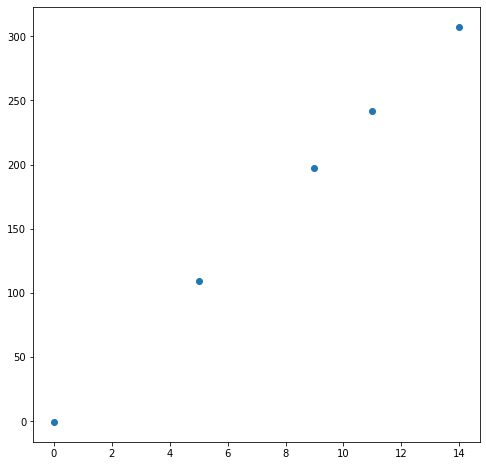

In [17]:
#Let's visualize the data first:

plt.figure( figsize = ( 8 , 8 ) )
plt.plot( x, y, marker = 'o', linestyle = 'none' )


In [18]:
# what do you think? is linear interpolation a good choice? how could we test it?

In [19]:
# use a function : y = a* x + c to calculate the y at the new x points


## Of course numpy already has a routine that does all of it for you: np.interp()
https://numpy.org/doc/stable/reference/generated/numpy.interp.html

In [20]:
y2 = np.interp( x1, x, y )

print( y2 )


[ 43.5  87.5 175.5 274.5]


## But what happens when your data are not a linear function of x?


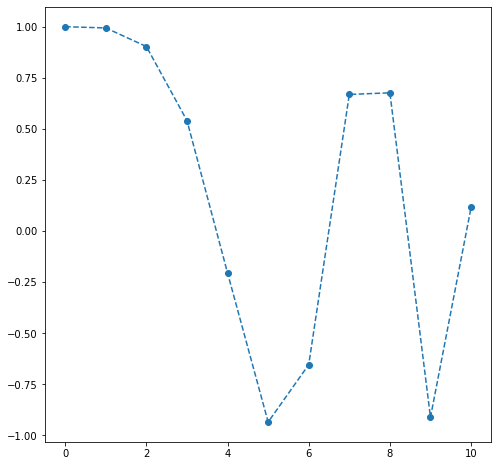

In [21]:
#example from https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
x = np.linspace( 0, 10, num = 11 )
y = np.cos( - x**2 / 9.0 )

#Let's plot it to see how it looks:
plt.figure( figsize = ( 8, 8 ) )
plt.plot( x, y, 'o', linestyle = '--' )

### you know that the underlying function is a cos, but if you just linearly connect the points you have they are a weird, sharp at points functions....so clearly, a linear interpolation between the two (numpy's linear interpolation) would not do a good job...

### In comes scipy:

In [22]:
from scipy.interpolate import interp1d


help(interp1d)


Help on class interp1d in module scipy.interpolate.interpolate:

class interp1d(scipy.interpolate.polyint._Interpolator1D)
 |  interp1d(x, y, kind='linear', axis=-1, copy=True, bounds_error=None, fill_value=nan, assume_sorted=False)
 |  
 |  Interpolate a 1-D function.
 |  
 |  `x` and `y` are arrays of values used to approximate some function f:
 |  ``y = f(x)``. This class returns a function whose call method uses
 |  interpolation to find the value of new points.
 |  
 |  Note that calling `interp1d` with NaNs present in input values results in
 |  undefined behaviour.
 |  
 |  Parameters
 |  ----------
 |  x : (N,) array_like
 |      A 1-D array of real values.
 |  y : (...,N,...) array_like
 |      A N-D array of real values. The length of `y` along the interpolation
 |      axis must be equal to the length of `x`.
 |  kind : str or int, optional
 |      Specifies the kind of interpolation as a string
 |      ('linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic',
 |      '

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 <a list of 7 Text major ticklabel objects>)

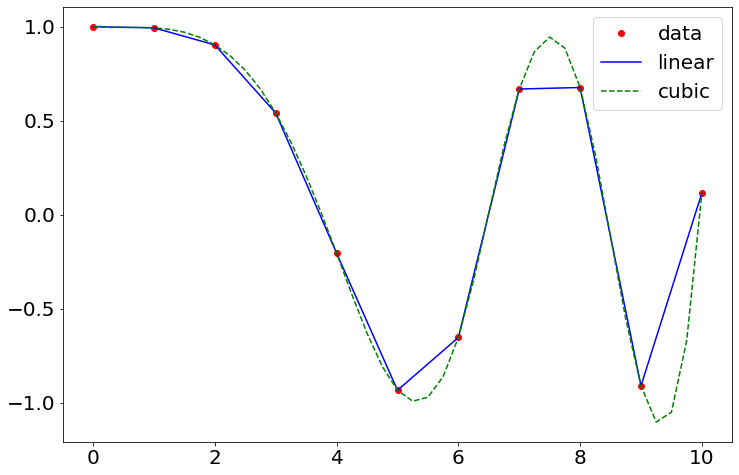

In [23]:
f  = interp1d( x, y)                    # linear interpolation
f2 = interp1d( x, y, kind = 'cubic' )   # cubic spline interpolation


xnew = np.linspace( 0, 10, num = 41, endpoint=True)

plt.figure( figsize = ( 12, 8 ) )

plt.plot( x, y, 'ro', xnew, f(xnew), 'b-', xnew, f2(xnew), 'g--')
# aka:
#plt.plot( x, y, marker = 'o', linestyle = 'none', color = 'red')
#plt.plot( xnew, f(xnew), linestyle = '-' , color = 'blue')
#plt.plot( xnew, f2(xnew), linestyle = '--', color = 'green' )

plt.legend( ['data', 'linear', 'cubic'], loc = 'best', fontsize = 20 )
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )


In [27]:
#this function is based on the cubic spline interpolation which you can also call directly:

from scipy.interpolate import  splrep,splev


In [28]:
#create your x and y arrays:
x = np.arange( 0, 2 * np.pi + np.pi / 4, 2 * np.pi / 8 )
y = np.sin( x )

#evaluate the spline derivatives (splrep) and the spline function (splev):   (FORTRAN powered ):
tck = splrep( x, y, s = 0 )
xnew = np.arange( 0, 2 * np.pi, np.pi / 50 )
ynew = splev( xnew, tck, der = 0 )


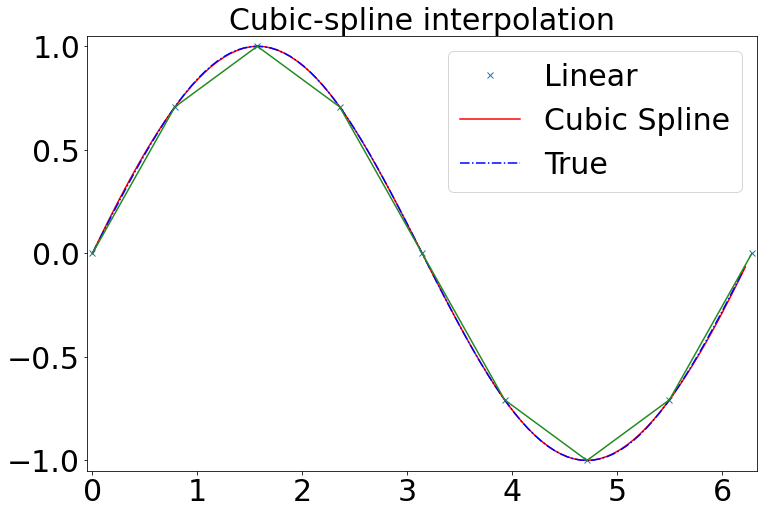

In [29]:
fig, ax = plt.subplots( figsize = ( 12, 8 ) )

plt.plot( x, y, 'x',linestyle = 'none')
plt.plot( xnew, ynew, color='red')
plt.plot( xnew, np.sin(xnew), linestyle = '-.',color='blue')
plt.plot( x, y,'forestgreen')
plt.legend( [ 'Linear', 'Cubic Spline', 'True' ],fontsize = 30 )
plt.axis( [ -0.05, 6.33, -1.05, 1.05 ] )
plt.title( 'Cubic-spline interpolation',fontsize = 30 )

ax.tick_params(axis='both', which='major', labelsize = 30 )


### splines are "a polynomial between each pair of table points, but one whose coefficients are determined 'slightly' nonlocally. The nonlocality is designed to guarantee global smoothness in the interpolated function up to some order of derivative"  (Numerical Recipes FORTRAN 77)
### A cubic spline is programmed to find the cubic polynomial $(a+ b*x + c*x^2 + d * x^3)$ within each interval (between your data points) that matches your data, and has continuous first and second derivatives at the knots 

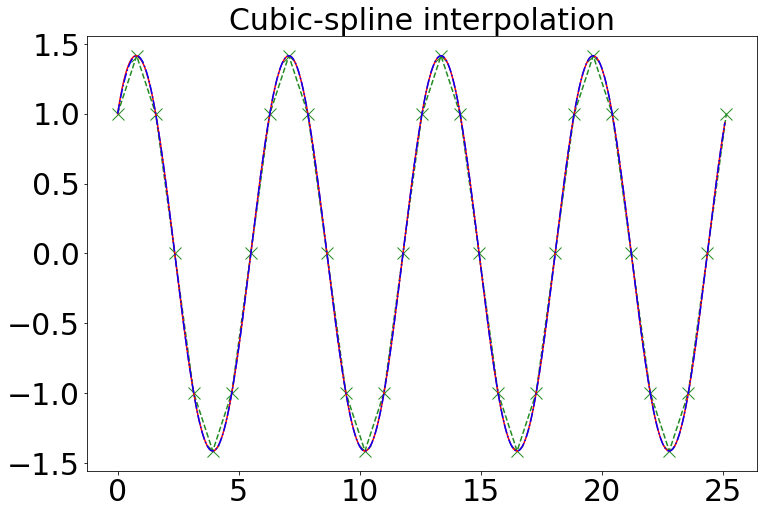

In [30]:
#let's try with a different dataset:

x = np.arange(0, 8*np.pi+np.pi/4, 2*np.pi/8)
y = np.sin(x)+np.cos(x)


#evaluate the spline derivatives (splrep) and the spline function (splev):   
tck = splrep(x, y, s=0)
xnew = np.arange(0, 8*np.pi, np.pi/50)
ynew = splev(xnew, tck, der=0)

fig, ax = plt.subplots( figsize = (12 , 8) )

plt.plot(x, y, 'x',color='forestgreen',linestyle='--',markersize=12)
plt.plot(xnew, ynew, color='red')
plt.plot(xnew, np.sin(xnew) +np.cos(xnew), linestyle = '-.',color='blue')

plt.title('Cubic-spline interpolation',fontsize = 30)

ax.tick_params(axis='both', which='major', labelsize=30)



### What if you have a 2D array and you want to interpolate between points in 2 dimensions? Then we have the bilinear interpolation:


In [31]:
from scipy.interpolate import  interp2d

In [32]:
#let's make our dataset:

x = np.arange( -5.01, 5.01, 0.25 )
y = np.arange( -5.01, 5.01, 0.25 )
xx, yy = np.meshgrid( x, y )

#Create a 2D array that uses xx , yy
z = np.sin( xx**2 + yy**2 ) / ( xx**2 + yy**2 )


In [33]:
# use the 2D interpolation
f = interp2d(x, y, z, kind='cubic')


(array([-0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,
         0.05]),
 <a list of 10 Text major ticklabel objects>)

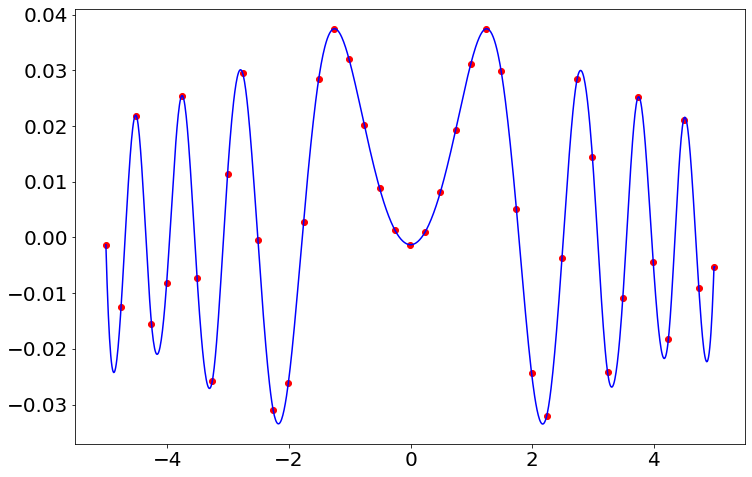

In [34]:
# plot the result:
xnew = np.arange( -5.01, 5.01, 1e-2 )
ynew = np.arange( -5.01, 5.01, 1e-2 )
znew = f( xnew, ynew )

plt.figure( figsize = ( 12, 8) )

plt.plot(x, z[0, :], 'ro')
plt.plot(xnew, znew[0, :], 'b-')
plt.xticks(fontsize =20 )
plt.yticks(fontsize =20 )


In [35]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html
#Suppose we want to interpolate the 2-D function on a grid in [0, 1]x[0, 1]

def func(x, y):
     return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2


grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

#but we only know its values at 1000 data points:


points = np.random.rand( 1000, 2 )
values = func( points[ :, 0 ], points[ :, 1 ] )
#This can be done with griddata() – below we try out all of the interpolation methods:


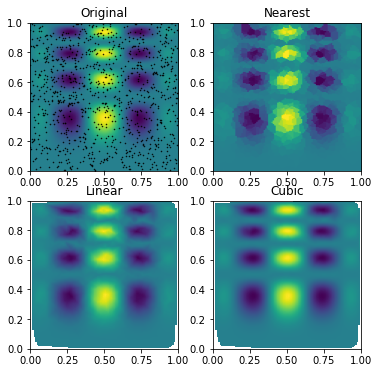

In [36]:
from scipy.interpolate import griddata

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

#One can see that the exact result is reproduced by all of the methods to some degree, but for this 
#smooth function the piecewise cubic interpolant gives the best results:


plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')

plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')

plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')

plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)


##  Extrapolation: 

### estimate the value of a function y(x) outside the initial range [x1,x2] for which we have data


### Most basic version: linear extrapolation. 

<img src="extrapolation_example_start.png" width=400 height=400 />

### You create a tangent line at the end of the known data and extend it  beyond that limit:

<img src="extrapolation_example.png" width=700 height=400 />

In [37]:
p1 = [1, 1]
p2 = [10, 10]

a = ( p2[1] - p1[1] ) / ( p2[0] - p1[0] )
b = p1[1]


#calculate y for x = 5 and x = 7:

print('Linear extrapolation to p4 at point x = 15 gives:', a * ( 15 - p1[ 0 ] ) + b,'\n')

Linear extrapolation to p4 at point x = 15 gives: 15.0 



### Linear extrapolation will only provide good results when used to extend the graph of an approximately linear function, or when you want a point not too far beyond the known data.

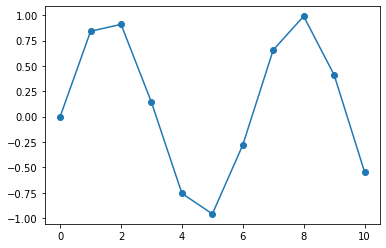

In [38]:
#Make a sin function between 0 and 10 and try to extrapolate to 12
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.sin(x)


plt.plot(x,y,marker='o')

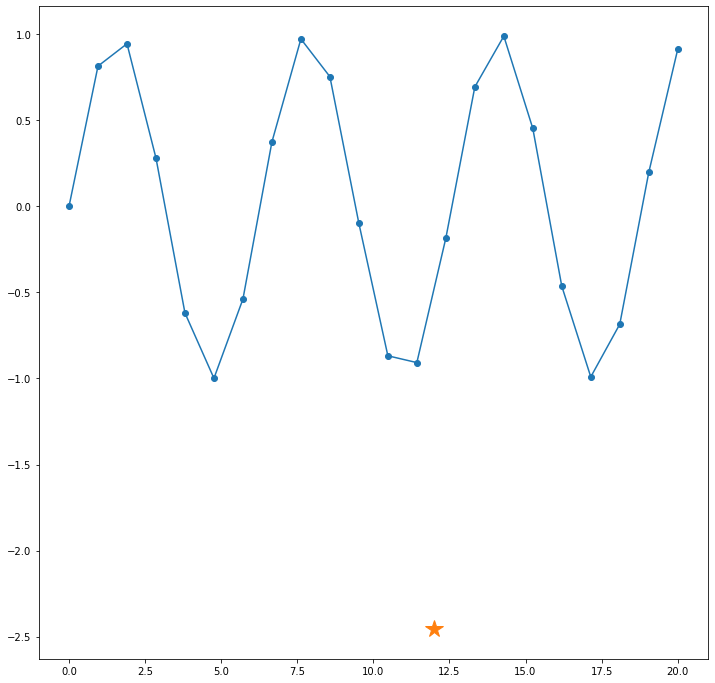

In [39]:
#we take the last two points x and y [9] and [10] and try to extrapolate at x = 12 :
y_pred = y[9] + ( 12 - x[ 9 ] ) / ( x[ 10 ] - x[ 9 ] ) * ( y[ 10 ] - y[ 9 ] )


x2 = np.linspace(0, 20, 22, endpoint=True)
y2 = np.sin( x2 )


plt.figure( figsize = ( 12, 12 ) )
plt.plot( x2, y2, marker = 'o' )
plt.plot( 12 , y_pred , marker = '*', markersize = 18 )  

In [40]:
# it (of course) fails!

### could we use interpolation as an extrapolation?

(-2.0, 2.0)

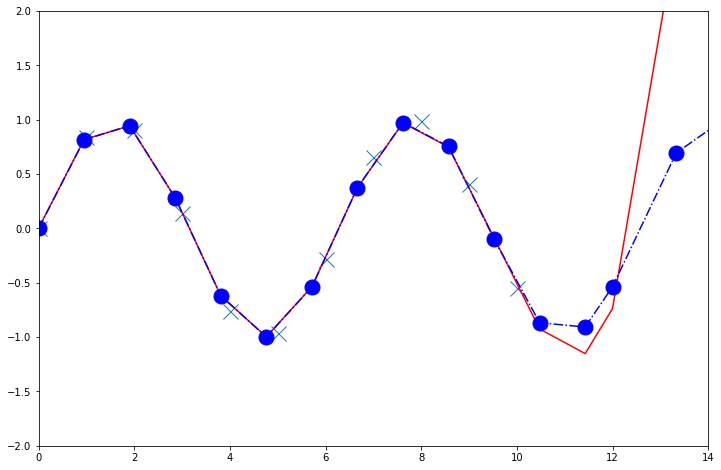

In [41]:
##from scipy.interpolate import  splrep,splev



x2[13] = 12.0

tck = splrep(x, y, s = 0 )
xnew = x2 
ynew = splev(xnew, tck, der =0)

fig, ax = plt.subplots(figsize = ( 12, 8 ) )

plt.plot( x, y, 'x',linestyle = 'none',markersize = 15)
plt.plot( xnew, ynew, color='red')
plt.plot( xnew, np.sin(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim(0,14)
plt.ylim(-2,2)


### it seems to be doing OK-ish close to the initial space, but notice how it deviates  a lot, very fast !


(-4.0, 2.0)

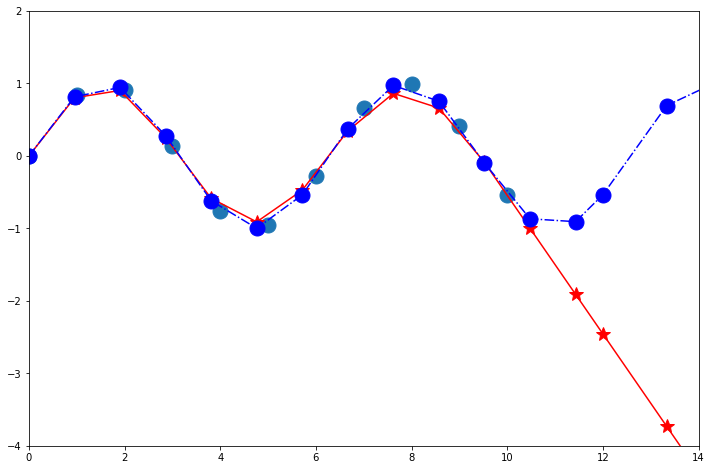

In [42]:
#try the interp1d of scipy:

f = interp1d(x, y , fill_value='extrapolate')

ynew2 = f( xnew )


fig, ax = plt.subplots(figsize = ( 12, 8 ) )

plt.plot( x, y, 'o',linestyle = 'none',markersize = 15)
plt.plot( xnew, ynew2, color='red', marker = '*',markersize = 15)
plt.plot( xnew, np.sin(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim( 0, 14 )
plt.ylim( -4, 2 )

# losing it fast

### how about exponential functions? 

(0.0, 14.0)

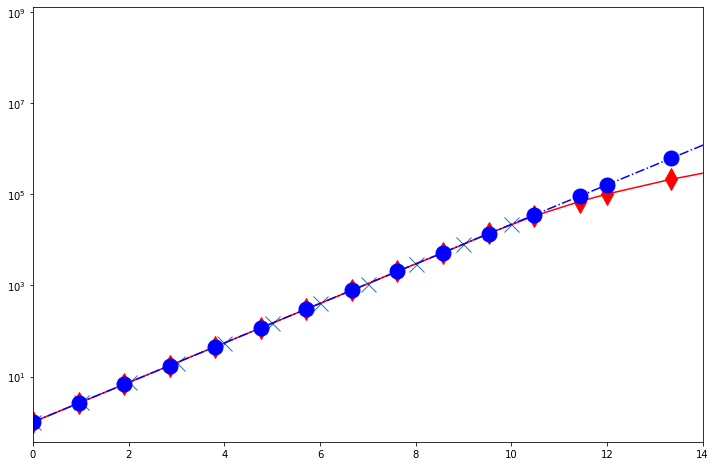

In [43]:

x = np.linspace( 0, 10, 11, endpoint=True)
y = np.exp( x )

x2[13] = 12.0

tck = splrep( x, y, s = 0 )
xnew = x2 
ynew = splev(xnew, tck, der=0)

fig, ax = plt.subplots(figsize = ( 12 , 8 ) )


#semilogy asks the plot to be logarithmic scale on the y axis (also have semilogx; loglog....)

plt.semilogy( x, y, 'x',linestyle = 'none',markersize = 15)
plt.semilogy( xnew, ynew, color='red', marker='d',markersize = 15)
plt.semilogy( xnew, np.exp(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim(0,14)



In [ ]:

##versus the full plot:

plt.figure(figsize = ( 12, 8 ) )
plt.plot( x, y, 'x',linestyle = 'none',markersize = 15)
plt.plot( xnew, ynew, color='red', marker='d',markersize = 15)
plt.plot( xnew, np.exp(xnew), linestyle = '-.',color='blue',marker='o',markersize = 15)
plt.xlim( 0,14 )
plt.ylim( 0,1e6 )


In [44]:
from scipy.interpolate import InterpolatedUnivariateSpline

# given values
xi = np.linspace(1,100,45)
yi = np.sin(xi) 

# positions to inter/extrapolate
x = np.linspace(0, 104, 50)  #-->test the further point; the more you push it the more you diverge from the real value

# spline order: 1 linear, 2 quadratic, 3 cubic ... 
order = 1

# do inter/extrapolation
s = InterpolatedUnivariateSpline(xi, yi, k=order)
y = s(x)

(-2.0, 2.0)

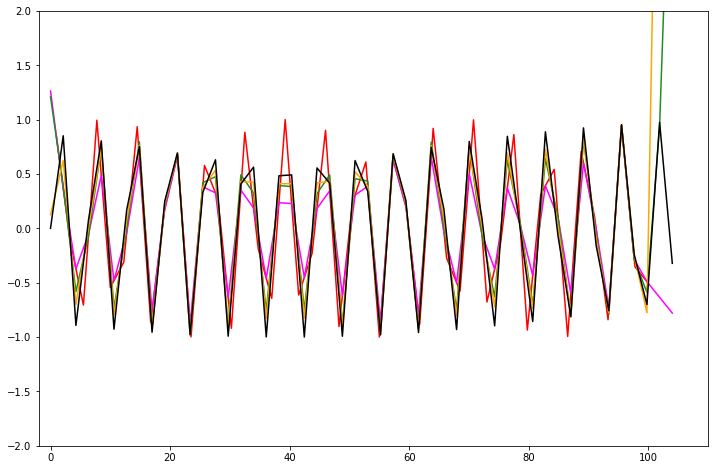

In [45]:
# example showing the interpolation for linear, quadratic and cubic interpolation
plt.figure(figsize = ( 12 , 8 ) )

plt.plot(xi, yi, color='red' )

clr = ['blue', 'magenta', 'forestgreen', 'orange']


for order in range(1, 4):
    s = InterpolatedUnivariateSpline(xi, yi, k=order)
    y = s(x)
    plt.plot(x, y, color = clr[order])

plt.plot( x, np.sin(x),color='black')
plt.xlim( -2, 110 )
plt.ylim( -2, 2 )


# ---------------------------------

## Practicum

### 1. You have observed thirty people and registered their weight [cm] and height [kg] (see below). Assuming that these two are directly related (i.e., ignore other parameters that could affect the person's weight), can you use these data to predict the most probable weight of someone 187cm tall? Can you predict the height of someone that weighs 120kg?

In [ ]:
height = np.array( [ 165, 172, 184, 154, 193, 177, 164, 210, 181, 158, 
                     176, 169, 142, 201, 195, 183, 174, 150, 161, 190 ] )
weight = np.array( [ 60 , 64, 76, 55, 79, 69, 57, 100, 70, 58, 
                     68 , 59, 46, 90, 85, 76, 66,  51, 58, 81  ] )

In [ ]:
# what do we need to do now to find the most probable weight of someone 187cm tall?

### 2. You have a range of series circuits for which you have calculated the voltage and resistance when using a 10A currrent. Assume you don't know Ohm's law. Can you calcute the resistance of a series circuit for V = 9.5 and V = 28.2 V?

### 3. Projectile motion is a form of motion experienced by an object or particle that is thrown near the Earth's surface and moves along a curved path under the action of gravity only. In this example you will study the parabolic motion of objects with different initial speeds and angles.  Create function balistics_planet( gravity, balistics_obj ) that gets as input a dictionary gravity and a dictionary balistics_obj and returns the maximum altitude the projectile reached (h_max) and the total time it traveled (t_tot).  

### gravity should have as keys the names of the four terrestrial planets (Mercury, Venus, Earth and Mars) and as values the acceleration of the four terrestrial planets: (3.7 ,  8.87 , 9.81 and 3.71). balistics_obj should have as keys the names of the four terrestrial planets and as keys lists containing the following information for the initial speed and angle of the projectile on each planet:
Planet |	Mercury|	Venus|	Earth	|Mars
--|:---------:|:---------:|:---------:|:---------:
Initial Speed (u0)	|0.2|	2.8|	8.81|	1.71
Angle (theta)	|30|	32|	50	|22
 
### Remember that $t_{tot} = 2*u0 * \sin(\theta)/g$   and that $h_{max} = u0^2  * \sin(\theta)^2 / (2*g)$ . 


### Call balistics_planet(gravity,balistics_obj) and print an informative sentence about the total time each projectile travelled on each planet and what the maximum altitude it reached is (like: " On Mercury the object with a starting speed of 0.2 and an angle of 30.0 degrees will travel for a total of XYZ and reach a maximum of NNN meters."). Format the statement so that the h_max and t_tot have 4 digit accuracy (so 1.0000). 



###  4. A mass of 0.2kg is hanging from the end of a spring with a constant k=3.5 N/m. You let the mass go, and the mass-spring system starts oscillating.  Assume that x0 = 0 [m], u0 = 0 [m/s]. Remember that g = 9.8 [m/s2], and that the force applied on the mass by the gravity-spring system is F = −mg - kx . 

### Your goal: Plot the oscillation of the mass over time t=np.linespace(0,4,100). 

### To do this, create a function oscillation(x0,t0,u0,k,m,g,t) that takes as input the initial position x0 of the object at time t0, its initial speed u0, the parameters k, m and g and the time at which you want to calculate the location of the mass t, and returns the corresponding location of the object x. 

### Tip 1: remember that F=m * a=m $\frac{d^2x}{d^2t}$.  
### Tip 2: to make the problem more tractable you can split the second order derivative into two first order differences ( $\frac{\Delta x}{\Delta t}$  and $\frac{\Delta u}{\Delta t}$ ).



### 5. Plot your x,y with errorbars sigma2 and sigma respectively. Plot x vs y only where sigma < 11.5.

In [ ]:
x = np.array( [0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 
               2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] ) 
y = np.array( [14.059, 19.18, 26.26, 25.95, 31.567, 44.464, 49.88, 
               64.016, 79.34, 93.229, 104.985, 113.425, 130.466, 150.331, 
               168.620, 185.888, 207.500, 225.716, 241.891, 268.802, 287.936] )

sigma = np.array( [12.536, 13.601, 11.8492, 15.937, 12.6478, 13.927, 11.445, 
                   10.224, 12.981, 10.969, 11.666, 12.060, 10.173, 10.292, 14.507, 
                   12.195, 11.578, 9.321, 12.602, 13.03, 8.6004] )

sigma2 = sigma * np.random.random( len(sigma) )* .2

### 6. Github in action: https://classroom.github.com/a/8tBzCzla